In [ ]:
#reference : https://www.kaggle.com/code/mohamedahmedae/yolov7-cardetection-customdataset-train

In [8]:
import numpy as np
import os, json 

In [7]:
import cv2
import random
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from os.path import join

TRAINING_PATH = "data/Training/"
training_dir = os.listdir(TRAINING_PATH)
training_dir[0]

'001_G1_01_무광원_계기판_정상주시_20200917_182234_02144.jpg'

In [9]:
train_label_dir = "preprocessed_dataset/train/labels/"
val_label_dir = "preprocessed_dataset/val/labels/"
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

In [10]:
train_image_dir = "preprocessed_dataset/train/images/"
val_image_dir = "preprocessed_dataset/val/images/"
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)

In [11]:
os.listdir(train_image_dir)

[]

(-0.5, 799.5, 1279.5, -0.5)

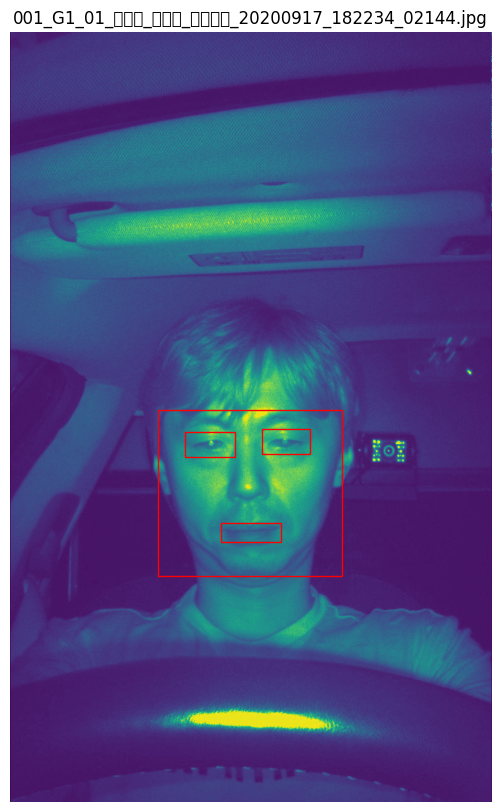

In [12]:
from PIL import Image
import warnings
warnings.simplefilter("ignore", UserWarning)

image = training_dir[0]

img = Image.open(join(TRAINING_PATH, training_dir[0]))
with open(join(TRAINING_PATH, training_dir[1]), encoding="utf-8") as f:
    json_object = json.load(f)
# print(join(TRAINING_PATH, training_dir[0], filenames[0]+'.jpg'))
# img = cv2.imread(join(TRAINING_PATH, training_dir[0], filenames[0]+'.jpg'))
# img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
fig, ax = plt.subplots(figsize=(10, 10))

xtl, ytl, xbr, ybr = 0, 1, 2, 3

for t, value in json_object['ObjectInfo']['BoundingBox'].items():

    if value['isVisible'] == False:
        continue
    obj = value["Position"]
    min_point = (obj[xtl], obj[ybr])

    w = obj[xbr] - obj[xtl]
    h = obj[ytl] - obj[ybr]
    rect = patches.Rectangle(min_point, w, h, linewidth=1,
                             edgecolor='r', facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)
plt.title(image)
ax.axis('off')

In [18]:
import re

re.sub(r"[가-힣]", "", image)

'001_G1_01____20200917_182234_02144.jpg'

In [13]:
classes = ["face", "leye_close", "leye_open", "reye_close", "reye_open",
           "mouth_close", "mouth_open", "cigar", "phone"]

In [14]:
import os
import shutil
from tqdm.auto import tqdm

TRAINING_PATH = 'data/Training/'
xtl, ytl, xbr, ybr = 0, 1, 2, 3

obj2cls = {"Face" : 0, "Leye" : 1, "Reye" : 3, "Mouth" : 5, "Cigar" : 7, "Phone" : 8}

filelist = list(set([join(TRAINING_PATH, name.split(".")[0]) for name in os.listdir(TRAINING_PATH) if len(name.split(".")) == 2]))

img_h, img_w, num_channels = (1280, 800, 3)

In [21]:
import re

def set_dataset(filelist, label_dir, image_dir):
    for file_path in tqdm(filelist):

        file_name = file_path.split("/")[-1]
        new_file_name = re.sub(r"[가-힣]", "", file_name)
        # open json file
        with open(file_path+'.json', encoding="utf-8") as f:
            json_object = json.load(f)

        rows = []
        for t, value in json_object['ObjectInfo']['BoundingBox'].items():
            if value['isVisible'] == False:
                continue
            obj = value['Position']
            w = obj[xbr] - obj[xtl]
            h = obj[ybr] - obj[ytl]
            x_center = (obj[xbr]+obj[xtl]) / 2
            y_center = (obj[ybr]+obj[ytl]) / 2
            class_ = obj2cls[t]
            if 'Opened' in value.keys():
                class_ += int(value["Opened"])

            w /= img_w
            h /= img_h
            x_center /= img_w
            y_center /= img_h

            row = f"{float(class_)} {float(x_center)} {float(y_center)} {float(w)} {float(h)}"
            rows.append(row)

        with open(label_dir + new_file_name+".txt", 'w+') as f:
            f.write('\n'.join(rows))

        shutil.copy(file_path+".jpg", f"{image_dir}{new_file_name}.jpg")


In [22]:
TRAINING_PATH = "data/Training/"
train_filelist = list(set([join(TRAINING_PATH, name.split(".")[0])
                      for name in os.listdir(TRAINING_PATH) if len(name.split(".")) == 2]))
set_dataset(train_filelist, train_label_dir, train_image_dir)

  0%|          | 0/22017 [00:00<?, ?it/s]

In [23]:
VALIDATION_PATH = "data/Validation/"
val_filelist = list(set([join(VALIDATION_PATH, name.split(".")[0])
                         for name in os.listdir(VALIDATION_PATH) if len(name.split(".")) == 2]))
set_dataset(val_filelist, val_label_dir, val_image_dir)

  0%|          | 0/5910 [00:00<?, ?it/s]

In [ ]:
import torch
torch.cuda.is_available()

True